# Домашнее задание №3

In [33]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [58]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

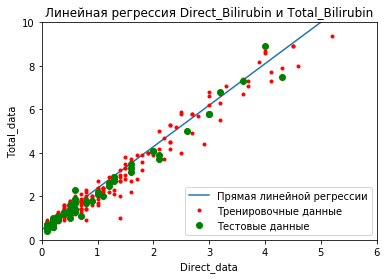

In [18]:
Direct_data = data['Direct_Bilirubin']
Total_data = data['Total_Bilirubin']
Direct_data = np.array(Direct_data).reshape(-1,1)
Total_data = np.array(Total_data).reshape(-1,1)

# 1.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Direct_data,
    Total_data,
    test_size = 0.2
)

# 2.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 3.
model.score(X_test, y_test)

# 4.
plt.xlabel('Direct_data')
plt.ylabel('Total_data')
plt.title('Линейная регрессия Direct_Bilirubin и Total_Bilirubin')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,6)
plt.ylim(0,10)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [7]:
print("Q2 квантиль ряда : ", np.quantile(data.Age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(data.Age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(data.Age, .75)) 
print("10 квантиль ряда : ", np.quantile(data.Age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [64]:
data.quantile([.10, .25, .50, .10], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0


Пример квартилей:

In [8]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

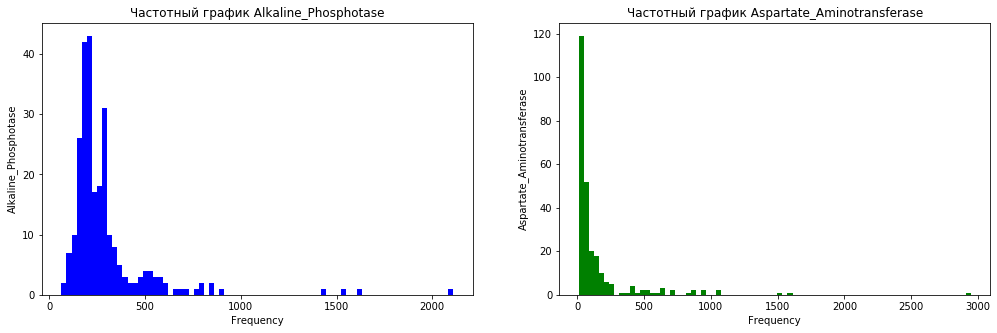

Среднее значение Alkaline_Phosphotase_small: 291.3992248062016
Среднее значение Aspartate_Aminotransferase_small: 146.43023255813952
Квартиль Alkaline_Phosphotase_small 50 %:  219.0
Квартиль Aspartate_Aminotransferase_small 50 %:  54.5


In [92]:
Alkaline_Phosphotase_small = data[(data['Age']<=50) & (data['Dataset']==1)]['Alkaline_Phosphotase']
Aspartate_Aminotransferase_small = data[(data['Age']<=50) & (data['Dataset']==1)]['Aspartate_Aminotransferase']
n_bins = 77
fig, axs = plt.subplots(1, 2, figsize=(17, 5))

axs[0].hist(Alkaline_Phosphotase_small, bins=n_bins, facecolor='b')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Alkaline_Phosphotase')
axs[0].set_title('Частотный график Alkaline_Phosphotase')

axs[1].hist(Aspartate_Aminotransferase_small, bins=n_bins, facecolor='g')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Aspartate_Aminotransferase')
axs[1].set_title('Частотный график Aspartate_Aminotransferase')

plt.show()

print('Среднее значение Alkaline_Phosphotase_small: '+str(Alkaline_Phosphotase_small.mean()))
print('Среднее значение Aspartate_Aminotransferase_small: '+str(Aspartate_Aminotransferase_small.mean()))
print("Квартиль Alkaline_Phosphotase_small 50 %: ", np.quantile(Alkaline_Phosphotase_small, .50)) 
print("Квартиль Aspartate_Aminotransferase_small 50 %: ", np.quantile(Aspartate_Aminotransferase_small, .50)) 

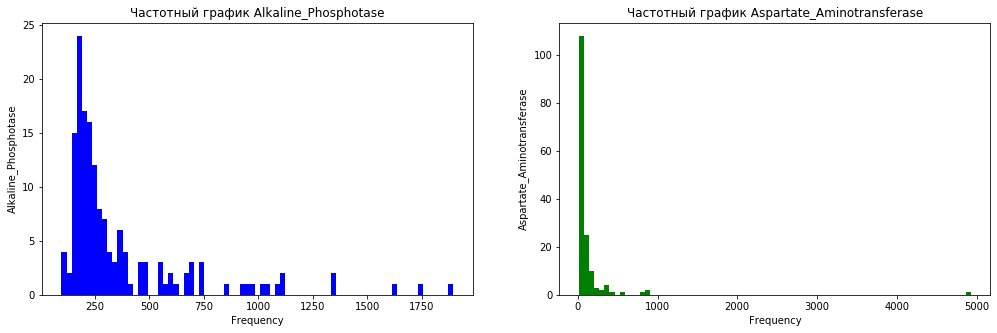

Среднее значение Alkaline_Phosphotase_small: 364.0886075949367
Среднее значение Aspartate_Aminotransferase_small: 123.44303797468355
Квартиль Alkaline_Phosphotase_small 50 %:  238.0
Квартиль Aspartate_Aminotransferase_small 50 %:  47.5


In [91]:
Alkaline_Phosphotase_small = data[(data['Age']>50) & (data['Dataset']==1)]['Alkaline_Phosphotase']
Aspartate_Aminotransferase_small = data[(data['Age']>50) & (data['Dataset']==1)]['Aspartate_Aminotransferase']
n_bins = 77
fig, axs = plt.subplots(1, 2, figsize=(17, 5))

axs[0].hist(Alkaline_Phosphotase_small, bins=n_bins, facecolor='b')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Alkaline_Phosphotase')
axs[0].set_title('Частотный график Alkaline_Phosphotase')

axs[1].hist(Aspartate_Aminotransferase_small, bins=n_bins, facecolor='g')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Aspartate_Aminotransferase')
axs[1].set_title('Частотный график Aspartate_Aminotransferase')

plt.show()

print('Среднее значение Alkaline_Phosphotase_small: '+str(Alkaline_Phosphotase_small.mean()))
print('Среднее значение Aspartate_Aminotransferase_small: '+str(Aspartate_Aminotransferase_small.mean()))
print("Квартиль Alkaline_Phosphotase_small 50 %: ", np.quantile(Alkaline_Phosphotase_small, .50)) 
print("Квартиль Aspartate_Aminotransferase_small 50 %: ", np.quantile(Aspartate_Aminotransferase_small, .50)) 


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборка не похожа на генеральную совокупность?

In [95]:
wiht_disease = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(with_disease, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

Вероятность того, что проверяемая нулевая гипотеза(о том, что средние значения выборок равны) верна, оказалась заметно мала: p-value = 0.0139 (что меньше стандартной альфа ошибки 0.05). Поэтому мы отвергаем нулевую гипотезу и можем сказать, что выборка wiht_disease имеет сильное статистическое различие с генеральной совокупностью Total_Bilirubin.

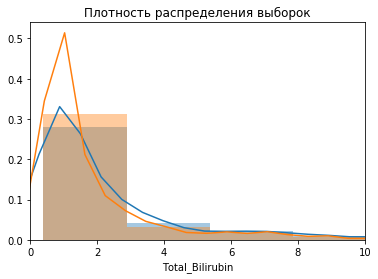

In [116]:
wiht_disease = data[data['Dataset']==1]['Total_Bilirubin']
Total = data['Total_Bilirubin']
sns.distplot(wiht_disease, 30)
sns.distplot(Total, 30)
plt.title('Плотность распределения выборок')
plt.xlim(0,10)
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [51]:
with_disease = data[data['Dataset']==1]['Total_Bilirubin']
no_disease = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(with_disease, no_disease)
# p-value меньше 0.05, значит группы статистически отличаются

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

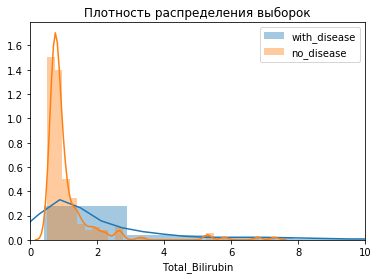

In [115]:
with_disease = data[data['Dataset']==1]['Total_Bilirubin']
no_disease = data[data['Dataset']==2]['Total_Bilirubin']
sns.distplot(wiht_disease, 30)
sns.distplot(no_disease, 30)
plt.title('Плотность распределения выборок')
plt.legend(['with_disease', 'no_disease'])
plt.xlim(0,10)
plt.show()

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [61]:
restecg_0 = data[data['Age']<=30]['Dataset']

restecg_1 = data[(data['Age']>30) & (data['Age']<=55)]['Dataset']

restecg_2 = data[data['Age']>=55]['Dataset']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=9.295980534257975, pvalue=0.00010575341508029506)